# SVM

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from yellowbrick.contrib.classifier import DecisionViz

In [0]:
### Datasets:

df = pd.read_csv('../occupancy_data/training_with_working_hours.csv')
df_test = pd.read_csv('../occupancy_data/test_with_working_hours.csv')

df = df.drop('Unnamed: 0', 1)
df_test = df_test.drop('Unnamed: 0', 1)

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#standardising the data:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Linear SVM

In [0]:
from sklearn.svm import LinearSVC

In [0]:
parameters = { 
               'C': np.arange(1, 1000, 10)
             }

In [0]:
svm_1 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 3)

In [0]:
svm_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [0]:
svm_1.best_estimator_

LinearSVC(C=11, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred = svm_1.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260065 0.9740656 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
svm_2 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 5)

In [0]:
svm_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [0]:
svm_2.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
svm_2.fit(X_train_scaled, y_train)
y_pred = svm_2.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260065 0.9740656 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
svm_3 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 10)

In [0]:
svm_3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 18...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [0]:
svm_3.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred = svm_3.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260065 0.9740656 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
svm_4 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 20)

In [0]:
svm_4.fit(X_train_scaled, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 18...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [0]:
svm_4.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred = svm_4.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260065 0.9740656 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



## Linear SVM on PCA'd dataset

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(2)

In [0]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [0]:
X_test_pca = pca.transform(X_test_scaled)

In [0]:
X_test_pca

array([[2.71997182, 0.97370135],
       [2.69684647, 0.99009112],
       [2.62653046, 0.98871545],
       ...,
       [2.44751735, 0.54800617],
       [2.62158261, 0.36810928],
       [2.78469267, 0.24386613]])

In [0]:
svm = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 5)

In [0]:
svm.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [0]:
svm.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9591940399593634
F1-score [0.97373297 0.90860827]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4604
           1       0.90      0.92      0.91      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.95      0.94      5906
weighted avg       0.96      0.96      0.96      5906



In [0]:
decision_function = svm.decision_function(X_train_pca)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_pca[support_vector_indices]

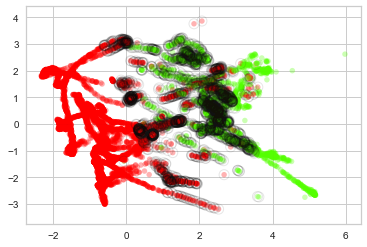

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.3, s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


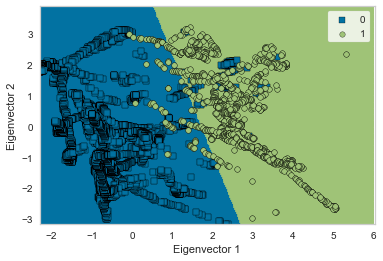

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

In [0]:
svm = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 20)

In [0]:
svm.fit(X_train_pca, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 18...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [0]:
svm.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9591940399593634
F1-score [0.97373297 0.90860827]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4604
           1       0.90      0.92      0.91      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.95      0.94      5906
weighted avg       0.96      0.96      0.96      5906



In [0]:
decision_function = svm.decision_function(X_train_pca)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_pca[support_vector_indices]

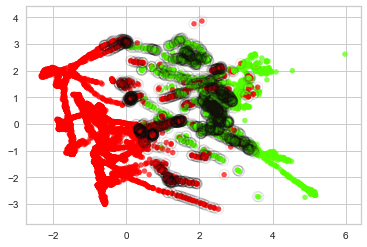

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


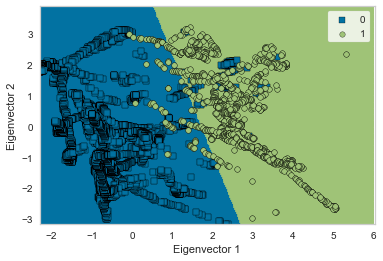

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Support vectors of previous SVM classifiers:

In [0]:
decision_function = svm_1.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [0]:
support_vectors_pca = pca.transform(support_vectors)

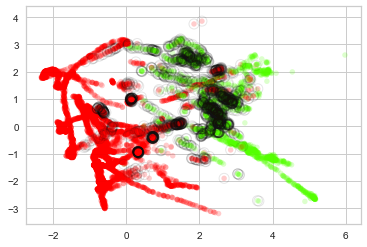

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.2, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k',  alpha = 0.1)
plt.show()

In [0]:
decision_function = svm_2.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [0]:
support_vectors_pca = pca.transform(support_vectors)

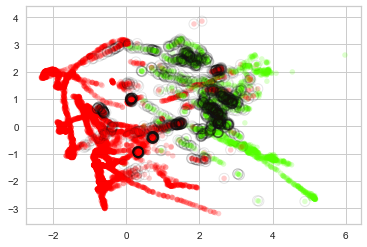

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.2, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

In [0]:
decision_function = svm_3.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [0]:
support_vectors_pca = pca.transform(support_vectors)

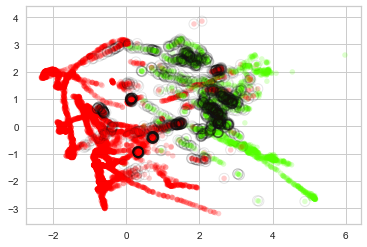

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.2, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

In [0]:
decision_function = svm_4.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [0]:
support_vectors_pca = pca.transform(support_vectors)

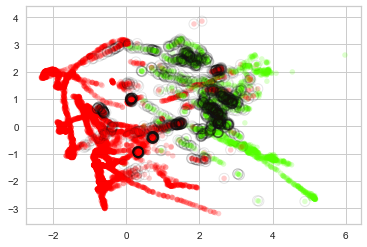

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.2, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

## Linear SVM on dataset with 2 of the original dimensions

The two dimensions have been selected that resulted the most important in dt classification: Temperature and Light

In [0]:
df = df[['Temperature','Light','Occupancy']]
df_test = df_test[['Temperature','Light','Occupancy']]

In [0]:
# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
svm_dt = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 5)

In [0]:
svm_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [0]:
svm_dt.best_estimator_

LinearSVC(C=11, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred = svm_dt.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9886556044700304
F1-score [0.99268    0.97480256]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.96      1.00      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
decision_function = svm_dt.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

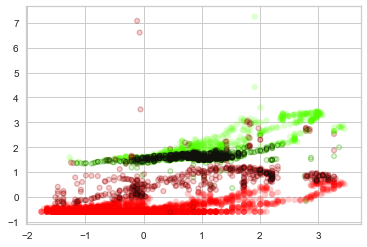

In [0]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.2, s=40)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=20,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.2)
plt.show()

PER MARTA: GRAFICO QUA SOTTO

> Indented block



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


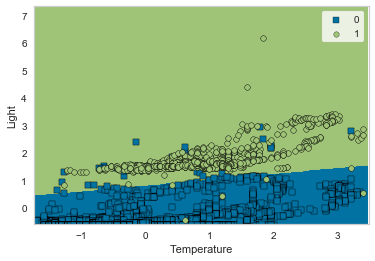

In [0]:
viz = DecisionViz(
    svm_dt,
    features=['Temperature', 'Light']
)
viz.fit(X_train_scaled, y_train)
viz.draw(X_test_scaled, y_test)
viz.show()

Getting the necessary info to plot decision boundary onto non-scaled training set:

In [0]:
support_vectors

array([[ 2.28594891e+00,  1.52106268e+00],
       [ 2.25694024e+00,  1.52106268e+00],
       [ 2.20859244e+00,  1.52106268e+00],
       ...,
       [-9.01727284e-04,  1.53967452e+00],
       [ 4.74460664e-02,  1.50865478e+00],
       [ 1.77985109e-01,  1.43668896e+00]])

In [0]:
sup_vecs_original = scaler.inverse_transform(support_vectors)

sup_vecs_original

array([[ 23.23119879, 435.0370018 ],
       [ 23.20099886, 435.0370018 ],
       [ 23.15066565, 435.0370018 ],
       ...,
       [ 20.85043758, 438.82625442],
       [ 20.9007708 , 432.51083339],
       [ 21.03667049, 417.85905661]])

In [0]:
X_train_scaled_rev = scaler.inverse_transform(X_train_scaled)
X_test_scaled_rev = scaler.inverse_transform(X_test_scaled)

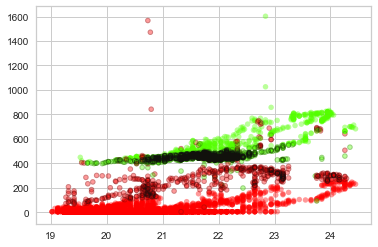

In [0]:
plt.scatter(X_train_scaled_rev[:, 0], X_train_scaled_rev[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.4, s=30)
plt.scatter(sup_vecs_original[:, 0], sup_vecs_original[:, 1], s=20,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.2)
plt.show()

aggiungere il grafico che costruisci con Marta?